<a href="https://colab.research.google.com/github/OlgaNezh/Neural_Networks/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание

### Вариант 1. (простой)

**обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist**

In [15]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.datasets import fashion_mnist

# keras.losses.SparseCategoricalCrossentropy()
from tensorflow.keras.losses import categorical_crossentropy
# tensorflow.keras.metrics.accuracy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
labels = {
        0: 'футболка',
        1: 'брюки',
        2: 'свитер',
        3: 'платье',
        4: 'куртка',
        5: 'сандалии',
        6: 'рубашка',
        7: 'кроссовки',
        8: 'сумка',
        9: 'ботинки',
            }
len(labels)

10

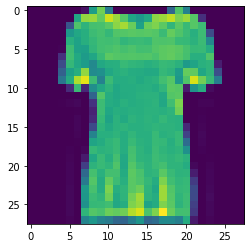

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Это футболка


In [24]:
N = 10
plt.imshow((tf.squeeze(x_train[N])))
plt.show()
label = np.argmax(y_train[N], axis = 0)
print(y_train[N])
print(f'Это {labels[label]}')


In [6]:
x_train[202,150:160]

array([], shape=(0, 28, 1), dtype=float32)

In [8]:
# Размер набора данных для обучения
x_train.shape

(60000, 28, 28, 1)

In [9]:
batch_size=32
epochs = 5
num_predictions = 20
results = []

In [10]:
# конфигурирование слоев нейросети
name='base_model'
model = Sequential(name=name)

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels)))
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              verbose=0)

In [11]:
model.summary()

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                        

In [18]:
# сохранение модели и весов
save_dir = '/colab.research.google.com/drive/1neZ6ZkR4s5jTmm2njMWRqdxeay4jgkE7?usp=sharing'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

INFO:tensorflow:Assets written to: /colab.research.google.com/drive/1neZ6ZkR4s5jTmm2njMWRqdxeay4jgkE7?usp=sharing/base_model/assets
сохранить обученную модель как /colab.research.google.com/drive/1neZ6ZkR4s5jTmm2njMWRqdxeay4jgkE7?usp=sharing/base_model 


In [19]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
# results.append([name, scores[0], scores[1]])
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.3950 - accuracy: 0.8559
Test loss: 0.3949659764766693
Test accuracy: 0.85589998960495


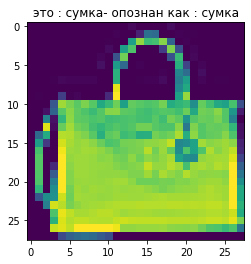

In [23]:
N = 30
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow((tf.squeeze(x_test[N])))
plt.title('это : '+labels[y_t[0]]+'- опознан как : '+labels[y_i[0]])
plt.show()

**оценить рост точности при увеличении ширины сети (больше ядер)**

In [25]:
kernel = [2, 4, 8, 16, 32, 64]

2_kernel_model
Test loss: 0.5654670596122742
Test accuracy: 0.8021000027656555
4_kernel_model
Test loss: 0.4809909760951996
Test accuracy: 0.8252000212669373
8_kernel_model
Test loss: 0.4368583858013153
Test accuracy: 0.8450999855995178
16_kernel_model
Test loss: 0.4038423001766205
Test accuracy: 0.853600025177002
32_kernel_model
Test loss: 0.3798825740814209
Test accuracy: 0.8596000075340271
64_kernel_model
Test loss: 0.3728150427341461
Test accuracy: 0.8651000261306763


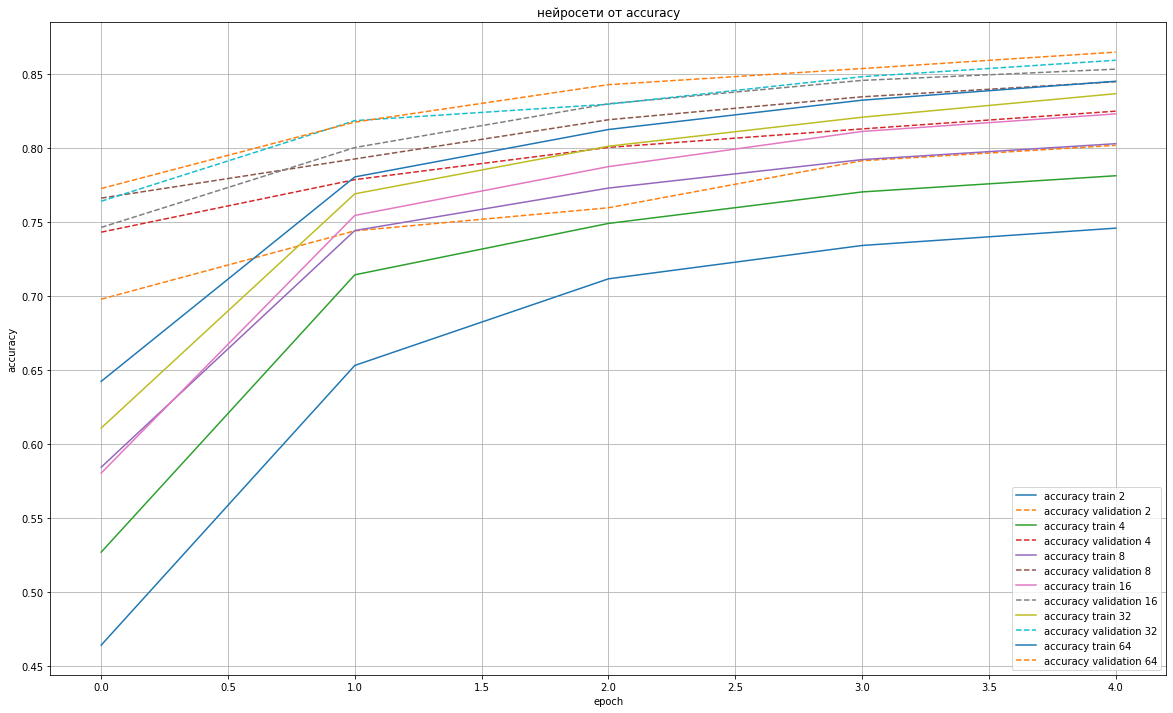

In [26]:
plt.figure(figsize=(20,12))

for k in kernel:
    name=f'{k}_kernel_model'
    print(name)
    model = Sequential(name=name)

    # слои нейросети отвественные за свертку и max-pooling
    model.add(Conv2D(k, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(k, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout( 0.25))

    model.add(Conv2D(2*k, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(2*k, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # полносвязные слои нейронной сети
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(labels)))
    model.add(Activation('softmax'))

    # компиляция модели
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])

    model_history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True,
                  verbose=0)
    
    scores = model.evaluate(x_test, y_test, verbose=0)
    results.append([name, scores[0], scores[1]])
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    plt.plot(model_history.history['accuracy'], '-', label = f'accuracy train {k}')
    plt.plot(model_history.history['val_accuracy'], '--', label = f'accuracy validation {k}')
        
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
pd.DataFrame(results, columns=['name', 'test loss', 'test accuracy']).sort_values(by='test accuracy')

,name,test loss,test accuracy
0,2_kernel_model,0.565467,0.8021
1,4_kernel_model,0.480991,0.8252
2,8_kernel_model,0.436858,0.8451
3,16_kernel_model,0.403842,0.8536
4,32_kernel_model,0.379883,0.8596
5,64_kernel_model,0.372815,0.8651


Точность растет с увеличением ядер

**оценить рост точности при увеличении глубины сети (больше слоев)**


In [29]:
max_stack_num = 3
kernel = 16
results2 = []

1_stack_model
Model: "1_stack_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 activation_42 (Activation)  (None, 28, 28, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 16)        2320      
                                                                 
 activation_43 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 13, 13, 16)        0         
                                       

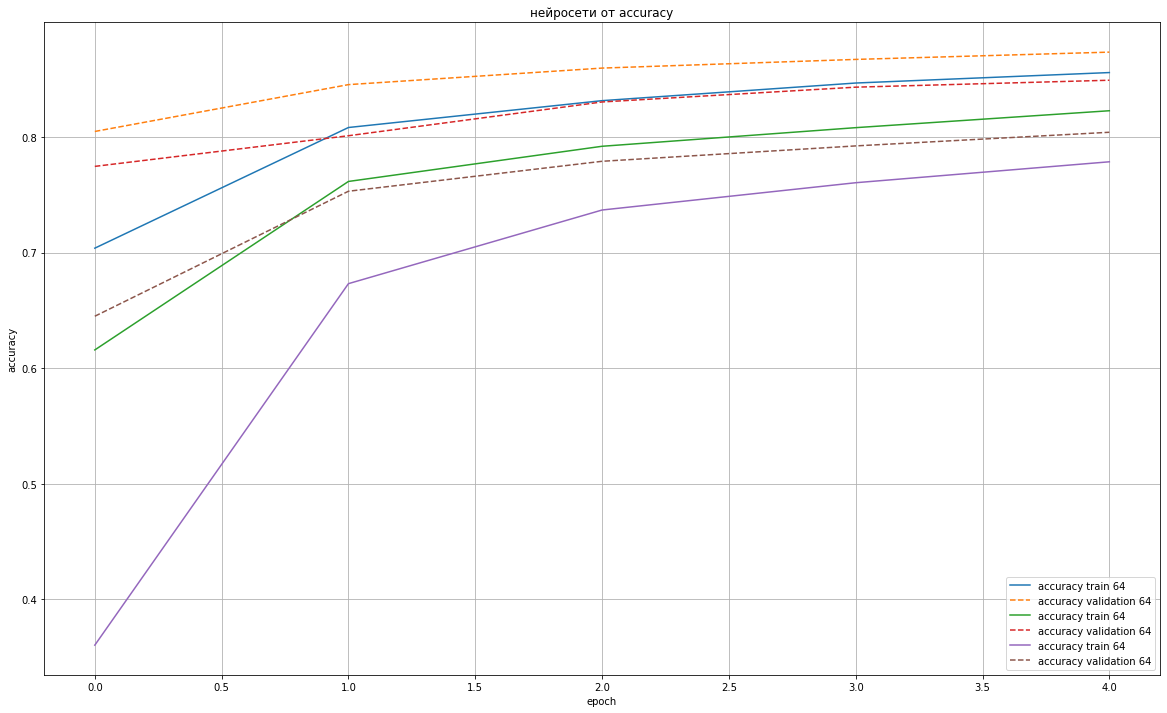

In [30]:
plt.figure(figsize=(20,12))

for num in range(1, max_stack_num+1):
    name=f'{num}_stack_model'
    print(name)
    model = Sequential(name=name)
    for n in range(num):
        # слои нейросети отвественные за свертку и max-pooling
        model.add(Conv2D(kernel*(2**n), (3, 3), padding='same',
                         input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        model.add(Conv2D(kernel*(2**n), (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout( 0.25))

    # полносвязные слои нейронной сети
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(labels)))
    model.add(Activation('softmax'))
    
    model.summary()

    # компиляция модели
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])

    model_history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True,
                  verbose=0)
    
    scores = model.evaluate(x_test, y_test, verbose=0)
    results2.append([name, scores[0], scores[1]])
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    plt.plot(model_history.history['accuracy'], '-', label = f'accuracy train {k}')
    plt.plot(model_history.history['val_accuracy'], '--', label = f'accuracy validation {k}')
        
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [31]:
pd.DataFrame(results2, columns=['name', 'test loss', 'test accuracy']).sort_values(by='test accuracy')

,name,test loss,test accuracy
2,3_stack_model,0.510503,0.8040
1,2_stack_model,0.409079,0.8490
0,1_stack_model,0.357791,0.8733


**(опциционально)сравнить с точностью полносвязной сети для этой выборки**

In [32]:

kernel = 64
epochs = 15 #как в примере с полносвязной сетью

name='result_model'
print(name)
model = Sequential(name=name)

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(kernel, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(kernel, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels)))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              verbose=0)

scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

result_model
Model: "result_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 activation_60 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 activation_61 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 13, 13, 64)        0         
                                         

In [33]:
predictions = model.predict(x_test)

y_predict = np.argmax(predictions, axis=1)
print(y_predict[:10])

print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


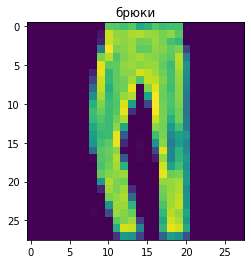

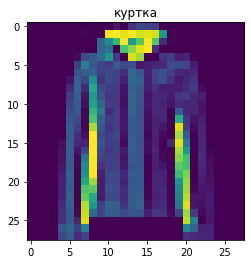

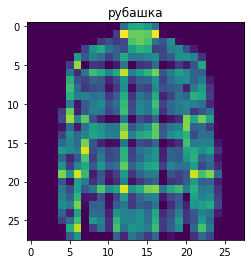

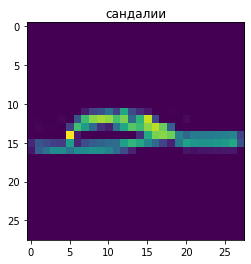

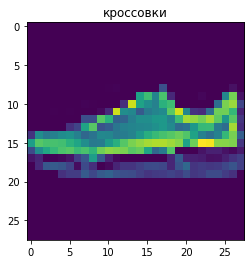

In [35]:
for n in range(5, 10):
    plt.imshow((tf.squeeze(x_test[n])))
    plt.title(labels[y_predict[n]])
    plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
cnf_matrix

array([[852,   0,  25,  24,   4,   2,  84,   0,   9,   0],
       [  2, 975,   0,  17,   3,   0,   1,   0,   2,   0],
       [ 14,   0, 868,  10,  60,   0,  47,   0,   1,   0],
       [ 10,   2,  12, 911,  36,   0,  25,   0,   4,   0],
       [  1,   1,  66,  22, 863,   0,  46,   0,   1,   0],
       [  0,   0,   0,   0,   0, 979,   0,  17,   0,   4],
       [105,   0,  90,  28,  68,   0, 700,   0,   9,   0],
       [  0,   0,   0,   0,   0,   7,   0, 981,   1,  11],
       [  2,   1,   3,   5,   3,   2,   4,   4, 976,   0],
       [  0,   0,   0,   0,   0,   9,   1,  44,   0, 946]])

In [37]:
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.82      0.87      0.84      1000
           3       0.90      0.91      0.90      1000
           4       0.83      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.70      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000

